## **Import libraries**

In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [32]:
import gdown
import zipfile

# Define the URL of the dataset.zip file
url = 'https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P'

# Define the path where you want to save the downloaded file
output_path = '/content/dataset.zip'

# Download the dataset.zip file
gdown.download(url, output_path, quiet=False)

# Extract the contents of the zip file
with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100%|██████████| 65.7M/65.7M [00:00<00:00, 245MB/s]


## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset directory
dataset_dir = '/content/dataset'

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(validation_split=0.2)

# Load and preprocess the training data
train_generator = datagen.flow_from_directory(
    dataset_dir,
    subset='training',
    class_mode='categorical',
    batch_size=32,
    target_size=(224, 224)
)

# Load and preprocess the validation data
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    subset='validation',
    class_mode='categorical',
    batch_size=32,
    target_size=(224, 224)
)

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with.

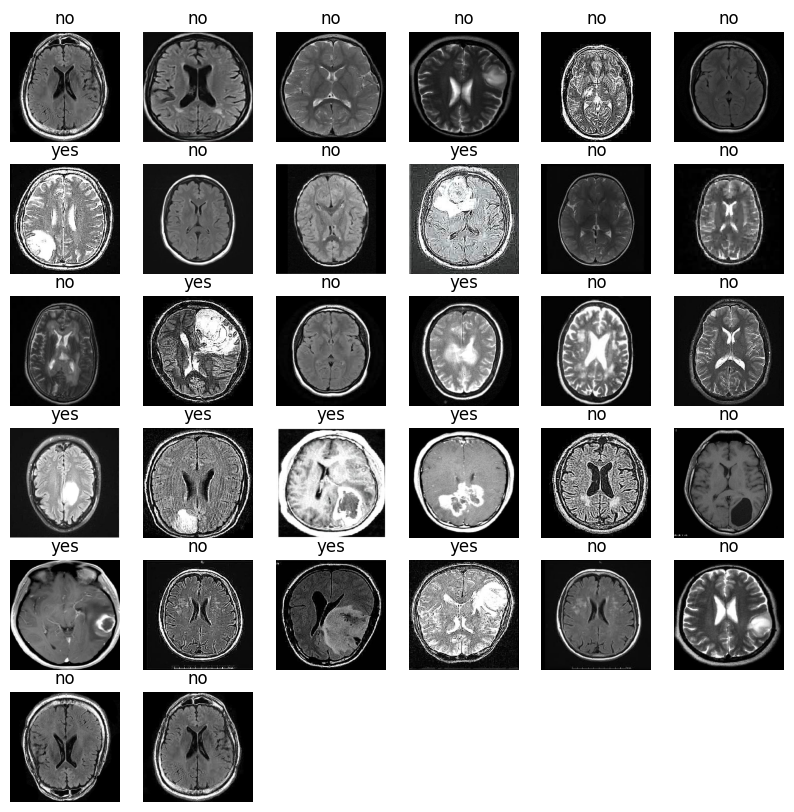

In [34]:
import math
import matplotlib.pyplot as plt

# Get a batch of images and labels from the training generator
images, labels = train_generator.next()

# Define the class labels
class_labels = train_generator.class_indices

# Define the class names
class_names = list(class_labels.keys())

# Calculate the number of rows and columns for subplots
num_images = len(images)
num_rows = math.ceil(math.sqrt(num_images))
num_cols = math.ceil(num_images / num_rows)

# Plot the images and their corresponding labels
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(images[i].astype('uint8'))
    plt.title(class_names[labels[i].argmax()])
    plt.axis('off')
plt.show()

In [35]:
print(train_generator[0][0].shape)

(32, 224, 224, 3)


## **Build the models**

In this section you will build the model with two approaches.
First you should build it with the Sequential API and then you have to work with the Functional API in the second part.

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [37]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 26, 26, 128)      

### **Train the model**

In [38]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/10
75/75 [==============================] - 12s 128ms/step - loss: 13.3808 - accuracy: 0.7613 - val_loss: 0.3738 - val_accuracy: 0.8455
Epoch 2/10
75/75 [==============================] - 13s 180ms/step - loss: 0.3574 - accuracy: 0.8492 - val_loss: 0.3335 - val_accuracy: 0.8264
Epoch 3/10
75/75 [==============================] - 7s 88ms/step - loss: 0.2805 - accuracy: 0.8829 - val_loss: 0.2900 - val_accuracy: 0.9306
Epoch 4/10
75/75 [==============================] - 8s 101ms/step - loss: 0.2571 - accuracy: 0.8983 - val_loss: 0.2529 - val_accuracy: 0.8733
Epoch 5/10
75/75 [==============================] - 8s 107ms/step - loss: 0.2213 - accuracy: 0.9129 - val_loss: 0.1180 - val_accuracy: 0.9601
Epoch 6/10
75/75 [==============================] - 6s 83ms/step - loss: 0.1108 - accuracy: 0.9621 - val_loss: 0.1128 - val_accuracy: 0.9722
Epoch 7/10
75/75 [==============================] - 8s 104ms/step - loss: 0.0777 - accuracy: 0.9767 - val_loss: 0.1043 - val_accuracy: 0.9705
Epoch

### **Test the model**

In [39]:
accuracy = model.evaluate(validation_generator)
print('Validation Accuracy:', accuracy[1])

19/19 [==============================] - 1s 71ms/step - loss: 0.0959 - accuracy: 0.9717
Validation Accuracy: 0.971666693687439


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

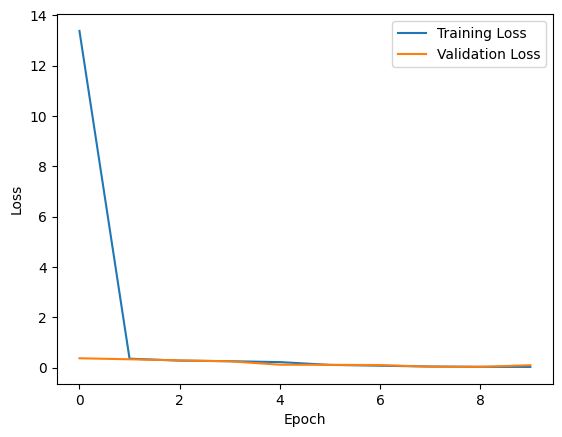

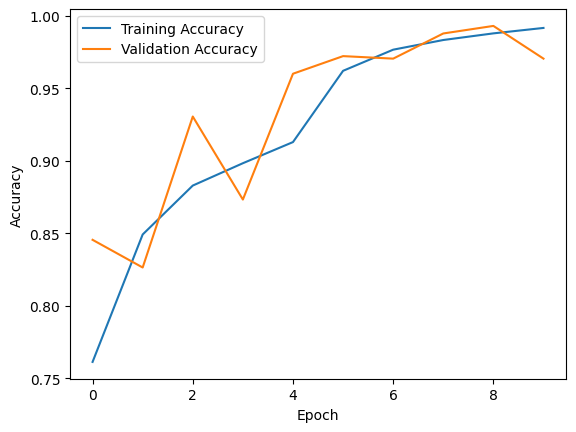

In [40]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **2.Functional API**

### **Build a model**

In [41]:
input_layer = tf.keras.Input(shape=(224, 224, 3))

x = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

output_layer = Dense(2, activation='softmax')(x)

model2 = tf.keras.Model(inputs=input_layer, outputs=output_layer)

In [42]:
# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_17 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 52, 52, 128)       73856 

### **Train the model**

In [43]:
history2=model2.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/10
75/75 [==============================] - 8s 89ms/step - loss: 14.2690 - accuracy: 0.7675 - val_loss: 0.4101 - val_accuracy: 0.8212
Epoch 2/10
75/75 [==============================] - 8s 108ms/step - loss: 0.3288 - accuracy: 0.8617 - val_loss: 0.2236 - val_accuracy: 0.9132
Epoch 3/10
75/75 [==============================] - 6s 83ms/step - loss: 0.2141 - accuracy: 0.9125 - val_loss: 0.1795 - val_accuracy: 0.9340
Epoch 4/10
75/75 [==============================] - 8s 104ms/step - loss: 0.1167 - accuracy: 0.9621 - val_loss: 0.1419 - val_accuracy: 0.9462
Epoch 5/10
75/75 [==============================] - 6s 82ms/step - loss: 0.0940 - accuracy: 0.9750 - val_loss: 0.0755 - val_accuracy: 0.9740
Epoch 6/10
75/75 [==============================] - 8s 108ms/step - loss: 0.0574 - accuracy: 0.9817 - val_loss: 0.0805 - val_accuracy: 0.9809
Epoch 7/10
75/75 [==============================] - 6s 82ms/step - loss: 0.0671 - accuracy: 0.9804 - val_loss: 0.0534 - val_accuracy: 0.9896
Epoch 8/1

### **Test the model**

In [44]:
accuracy = model2.evaluate(validation_generator)
print('Validation Accuracy:', accuracy[1])

19/19 [==============================] - 1s 60ms/step - loss: 0.0520 - accuracy: 0.9900
Validation Accuracy: 0.9900000095367432


### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

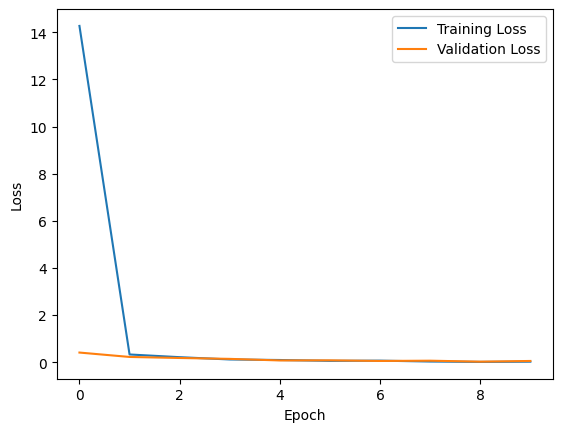

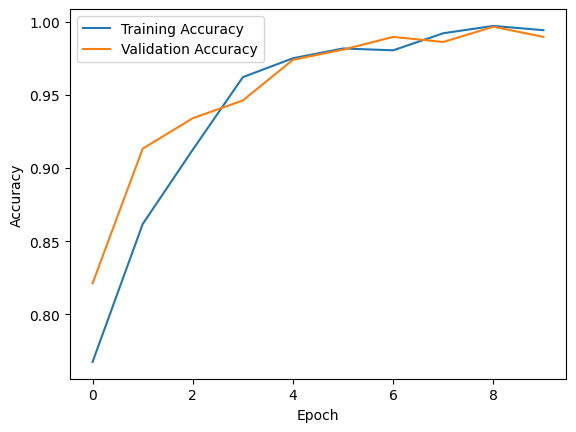

In [45]:
import matplotlib.pyplot as plt

# Plotting the loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()